# Data Wrangling Template

## Import and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile as zp
import random 
import seaborn as sns
random.seed(42)
%matplotlib inline
pd.options.display.max_rows = 100

## Gather

In [3]:
with zp.ZipFile('datasets/armenian-online-job-postings.zip', 'r') as myzipfile:
    myzipfile.extractall('datasets/')

In [5]:
df = pd.read_csv('datasets/online-job-postings.csv')

## Assess

In [6]:
df.head(10)


,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\r\nJOB TI...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\r\...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\r\...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\r\nJ...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\r\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\r\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\r\...,NaN,2004,1,False
3,Manoff Group\r\nJOB TITLE: BCC Specialist\r\n...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\r\n...,NaN,23 January 2004\r\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\r\nJOB TITLE: Software...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
5,"Boutique ""Appollo""\r\nJOB TITLE: Saleswoman\r...","Jan 10, 2004",Saleswoman,"Boutique ""Appollo""",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For further information, please contact Irina\...",NaN,01 February 2004,NaN,NaN,NaN,2004,1,False
6,OSI Assistance Foundation - Armenian Branch Of...,"Jan 11, 2004",Chief Accountant/ Finance Assistant,OSI Assistance Foundation - Armenian Branch Of...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"For submission of applications/ CVs, please\r\...",NaN,"16 January 2004, 6:00 pm.",NaN,NaN,NaN,2004,1,False
7,International Research & Exchanges Board (IREX...,"Jan 13, 2004",Non-paid part or full time Programmatic Intern,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,6 months,...,NaN,"To apply, please download and submit the\r\nap...",NaN,16 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
8,Yerevan Brandy Company \r\nJOB TITLE: Assista...,"Jan 13, 2004",Assistant to Managing Director,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\r\n- CV; \...,NaN,"27 January 2004, 18:00",NaN,NaN,NaN,2004,1,False
9,American Embassy Yerevan\r\nANNOUNCEMENT NUMBE...,"Jan 13, 2004","Program Assistant (INL), FSN-8; FP-6*",American Embassy Yerevan\r\nANNOUNCEMENT NUMBE...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Interested candidates for this position should...,NaN,26 January 2004 \r\nDrafted: GSargsyan\r\nC...,NaN,NaN,NaN,2004,1,False


- Missing values (NaN)
- StartDate inconsistencies (ASAP, immidiately, as soon as possible)
- Deadline time format inconsistencies

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost             19001 non-null object
date                19001 non-null object
Title               18973 non-null object
Company             18994 non-null object
AnnouncementCode    1208 non-null object
Term                7676 non-null object
Eligibility         4930 non-null object
Audience            640 non-null object
StartDate           9675 non-null object
Duration            10798 non-null object
Location            18969 non-null object
JobDescription      15109 non-null object
JobRequirment       16479 non-null object
RequiredQual        18517 non-null object
Salary              9622 non-null object
ApplicationP        18941 non-null object
OpeningDate         18295 non-null object
Deadline            18936 non-null object
Notes               2211 non-null object
AboutC              12470 non-null object
Attach              1559 non-null object
Year              

- Cryptic column headers (ApplicationP, AboutC)
- Multiple dates with overlapping meaning(date, Year, Month)
- Company data mixed w/ job data

In [8]:
df.Year.value_counts()

2012    2149
2015    2009
2013    2009
2014    1983
2008    1785
2011    1697
2007    1538
2010    1511
2009    1191
2005    1138
2006    1116
2004     875
Name: Year, dtype: int64

In [10]:
df['Year'].value_counts()

2012    2149
2015    2009
2013    2009
2014    1983
2008    1785
2011    1697
2007    1538
2010    1511
2009    1191
2005    1138
2006    1116
2004     875
Name: Year, dtype: int64

In [11]:
pd.value_counts(df.Year, ascending=True)

2004     875
2006    1116
2005    1138
2009    1191
2010    1511
2007    1538
2011    1697
2008    1785
2014    1983
2013    2009
2015    2009
2012    2149
Name: Year, dtype: int64

In [28]:
df_clean= df.copy()

## Clean

### Define
- Select all records in the StartDate column, that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP"
- Select all nondiscriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words with no spaces (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)

### Code
- Select all nondiscriptive and misspelled column headers (ApplicationP, AboutC, RequiredQual, JobRequirment) and replace them with full words with no spaces (ApplicationProcedure, AboutCompany, RequiredQualifications, JobRequirement)

In [29]:
df_clean.rename(columns={'RequiredQual':'RequiredQualification',
                         'AboutC':'AboutCompany',
                         'ApplicationP':'ApplicationProcedure',
                         'JobRequirment':'JobRequirement'},inplace = True)

### Test

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
jobpost                  19001 non-null object
date                     19001 non-null object
Title                    18973 non-null object
Company                  18994 non-null object
AnnouncementCode         1208 non-null object
Term                     7676 non-null object
Eligibility              4930 non-null object
Audience                 640 non-null object
StartDate                9675 non-null object
Duration                 10798 non-null object
Location                 18969 non-null object
JobDescription           15109 non-null object
JobRequirement           16479 non-null object
RequiredQualification    18517 non-null object
Salary                   9622 non-null object
ApplicationProcedure     18941 non-null object
OpeningDate              18295 non-null object
Deadline                 18936 non-null object
Notes                    2211 non-null object
AboutC

### Code
- Select all records in the StartDate column, that have "As soon as possible", "Immediately", etc. and replace the text in those cells with "ASAP"

In [31]:
df_clean.StartDate.value_counts()

ASAP                        4754
Immediately                  773
As soon as possible          543
Upon hiring                  261
Immediate                    259
                            ... 
18 January 2010                1
14 February 2005               1
Preferably mid-July 2007       1
15 July 2007                   1
February  2007                 1
Name: StartDate, Length: 1186, dtype: int64

In [32]:
for i in range(df_clean.StartDate.nunique()):
    print(df_clean.StartDate.unique()[i])

nan
Immediately
27 April 2004
01 May 2004
10 May 2004
1st June 2004
Immadiate
20 April 2004
May 2004
Friday, 2004 04 23 18:00
This position starts in May 2004
May 17-21, 2004
1st - 3rd June 2004
Immediate
ASAP
June 2004
01 September 2004
01 June 2004
Between 2004-06-28 12:00 AM and 2004-07-02 12:00 AM
15 June 2004
In the near future
2nd or 3rd week of June, 2004 (three month
probationary period)
End of June
July, 2004
as soon as possible
Midst June, 2004
As soon as possible
06 July 2004
01 July 2004
15 July 2004
immediately
July-November, 2004
Applicants must be able to start no later than July
19, 2004. Position to be filled as soon as possible; will remain open
until filled
September 6
As agreed with the trainer
29 June 2004.  7:30 pm
Estimated start date of employment 2nd Quarter 2004
August 2004
11 July 2004
1 July, 2004
October 2004
26 August 2004
Late August 2004
01 August 2004
04 August 2004
19 July 2004
20 July 04
Early August 2004
22 July 2004
23 July 2004
30 July 2004
01 Autu

27 March 2008
07 April 2008
20 April 2008
July 2008
14 April 2008
May 2008
25 April 2008
Upon signing of the contract
21 April 2008
April, 2008
2 May, 2008, 18:30
02 June 2008
April 29-30, 2008 at 16:30
Monday, 21 April 2008 at 18:00
01 September 2008
15 June 2008
01 June 2008
14 May 2008
The course is planned in the first half of October;
the exact dates will be announced in July 2008.
26 May 2008
June 2008
September 2008
01 July 2008
Beginning of July 2008
01 October 2008
07 July 2008
01 August 2008
14 July 2008
By 15 August 2008, but no later than September 1,
2008
ASAP preferred
28 July 2008
15 July 2008
30 July 2008
15 August 2008
08 July 2008, 18:00
20 July 2008
11 August 2008
10 August 2008
1 September 2008
December 2008 (we are planning to conduct the
trainings on Christmas days/ 24-25 December)
24 August 2008
August 25
20 August 2008
As soon as possible.
Mid August thru December 2008
15.09.08
Immediate employment opportunity
25 August 2008
15 September 2008
Earliest  possible


05 November 2013
04 November 2013, 16:00
10 November 2013
15 November 2013
11 November 2013
December 2013
01 January 2014
16 December 2013
18 December 2013
03 December 2013
January 2014 - August 2014
19 December 2013
08 January 2014
10 January 2014
21 January  2014
13 January 2014
01 March 2014 (preferably)
February 2014
03 February 2014
15 February 2014
01 February 2014
01 April 2014
01 March 2014 (preferably).
01 March 2014
May 2014
March 2014
Autumn 2014
03 March 2014
17 February 2014
August/ September 2014
26 February 2014
01 May 2014
01 June 2014
April 2014 or ASAP
20 March 2014
May 1, 2014
01 April 2014 or ASAP
March/ April 2014
April 2014
15 April 2014
12 May 2014
18 April 2014
21 April 2014
26 April 2014
05 May 2014
June 2014
June 2014 (expected)
01 August 2014
01 July 2014
Expected starting date 05 May 2014
ASAP with 3 months probation period.
15 May 2014
Immediately or as per agreement
19 May 2014
16 June 2014
09 June 2014
June
July/ August 2014
12 June 2014
Expected: 05 June

In [34]:
asap_list = ['Immediately','As soon as possible', 'Upon hiring',
             'Immediate', 'Immediate employment', 'As soon as possible.', 'Immediate job opportunity',
             '"Immediate employment, after passing the interview."',
             'ASAP preferred', 'Employment contract signature date',
             'Immediate employment opportunity', 'Immidiately', 'ASA',
             'Asap', '"The position is open immediately but has a flexible start date depending on the candidates earliest availability."',
             'Immediately upon agreement', '20 November 2014 or ASAP',
             'immediately', 'Immediatelly',
             '"Immediately upon selection or no later than November 15, 2009."',
             'Immediate job opening', 'Immediate hiring', 'Upon selection',
             'As soon as practical', 'Immadiate', 'As soon as posible',
             'Immediately with 2 months probation period',
             '12 November 2012 or ASAP', 'Immediate employment after passing the interview',
             'Immediately/ upon agreement', '01 September 2014 or ASAP',
             'Immediately or as per agreement', 'as soon as possible',
             'As soon as Possible', 'in the nearest future', 'immediate',
             '01 April 2014 or ASAP', 'Immidiatly', 'Urgent',
             'Immediate or earliest possible', 'Immediate hire',
             'Earliest  possible', 'ASAP with 3 months probation period.',
             'Immediate employment opportunity.', 'Immediate employment.',
             'Immidietly', 'Imminent', 'September 2014 or ASAP', 'Imediately']

for i in asap_list:
    df_clean.StartDate.replace(i,'ASAP', inplace=True)

### Test

In [35]:
df_clean.StartDate.value_counts()

ASAP                        6856
01 September 2012             31
March 2006                    27
November 2006                 22
January 2010                  19
                            ... 
18 January 2010                1
14 February 2005               1
Preferably mid-July 2007       1
15 July 2007                   1
February  2007                 1
Name: StartDate, Length: 1140, dtype: int64

In [36]:
df.StartDate.value_counts()

ASAP                        4754
Immediately                  773
As soon as possible          543
Upon hiring                  261
Immediate                    259
                            ... 
18 January 2010                1
14 February 2005               1
Preferably mid-July 2007       1
15 July 2007                   1
February  2007                 1
Name: StartDate, Length: 1186, dtype: int64

In [37]:
len(asap_list)


49

In [46]:
for phrase in asap_list:
    assert phrase not in df_clean.StartDate.values


## Analysis and Visualization

- Proportion of job postings with urgent start date i.e. "ASAP":

In [50]:
asap_counts = df_clean.StartDate.value_counts()['ASAP']
asap_ratio = asap_counts/df_clean.StartDate.count()
asap_ratio

0.7086304909560723

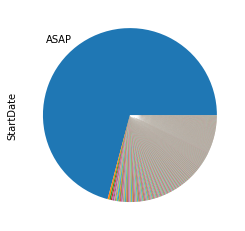

In [48]:
labels = np.full(len(df_clean.StartDate.value_counts()), '',dtype=object)
labels[0]= 'ASAP'
df_clean.StartDate.value_counts().plot(kind= 'pie', labels=labels);

- Proportion of job postings with urgent start date i.e. "ASAP" in original, dirty data:

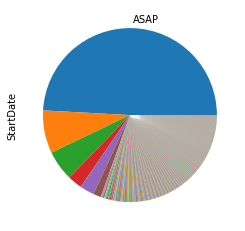

In [49]:
labels = np.full(len(df.StartDate.value_counts()), '',dtype=object)
labels[0]= 'ASAP'
df.StartDate.value_counts().plot(kind= 'pie', labels=labels);

The comparison above shows that by cleaning the data the ratio of ASAP job postings moved from barly 50% to about 70%. It is a 20% increase and may have a real effect on any decision making.

Now lets save the cleaned data.

In [52]:
df_clean.to_csv('datasets/cleaned_online-job-postings.csv')

In [53]:
# This line needs openpyxl to run
df_clean.to_excel("datasets/cleaned_online-job-postings.xlsx")
